In [1]:
import numpy as np 
import cv2 

from matplotlib import pyplot as plt 
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D 
from tensorflow.keras.models import Sequential
from IPython.display import clear_output

In [2]:
SIZE = 256
img_data = []

img = cv2.imread('./Cristiano Ronaldo.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [4]:
model.fit(img_array, img_array, epochs=5000, shuffle=True)

Epoch 1/5000
1/1 [==============================] - 1s 1s/step - loss: 0.1363
Epoch 2/5000
1/1 [==============================] - 0s 119ms/step - loss: 0.1350
Epoch 3/5000
1/1 [==============================] - 0s 114ms/step - loss: 0.1328
Epoch 4/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.1298
Epoch 5/5000
1/1 [==============================] - 0s 121ms/step - loss: 0.1260
Epoch 6/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.1216
Epoch 7/5000
1/1 [==============================] - 0s 122ms/step - loss: 0.1157
Epoch 8/5000
1/1 [==============================] - 0s 122ms/step - loss: 0.1085
Epoch 9/5000
1/1 [==============================] - 0s 120ms/step - loss: 0.1001
Epoch 10/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0905
Epoch 11/5000
1/1 [==============================] - 0s 112ms/step - loss: 0.0801
Epoch 12/5000
1/1 [==============================] - 0s 154ms/step - loss: 0.0696
Epoch 13/5000
1/1 [=========

1/1 [==============================] - 0s 135ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


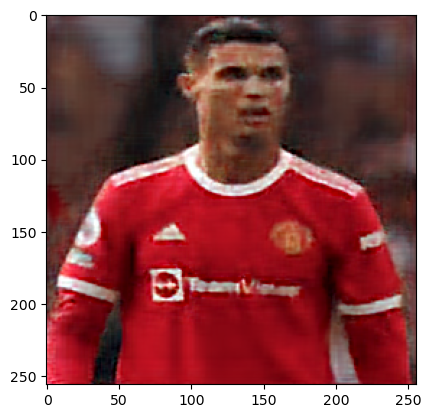

In [5]:
pred = model.predict(img_array)
plt.imshow(pred[0].reshape(SIZE, SIZE, 3))
plt.show()